# ¿Qué vende un coche?

## Índice <a id='back'></a>
* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [1.1. Descripción de los datos](#data_review_data_review)
    * [1.2. Valores ausentes](#data_review_missing_values)
    * [1.3. Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1. Duplicados implícitos y datos problemáticos](#data_preprocessing_duplicated)
    * [2.2. Duplicados obvios](#data_preprocessing_duplicated_ob)
    * [2.3. Completar valores ausentes](#data_preprocessing_missing_values)
        * [2.3.1 Restaurar valores ausentes en `'model_year'`](#data_preprocessing_missing_values_year)
        * [2.3.2 Restaurar valores ausentes en `'cylinders'`](#data_preprocessing_missing_values_cylinders)
        * [2.3.3 Restaurar valores ausentes en `'odometer'`](#data_preprocessing_missing_values_odometer)
    * [2.4. Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis exploratorio de datos](#data_analysis)
    * [3.1. Histogramas](#data_analysis_histograms)
    * [3.2. Valores atípicos](#data_analysis_atypical)
    * [3.3. Histogramas sin valores atípicos](#data_analysis_typical)
    * [3.4. Conclusiones](#data_analysis_conclusions)
* [Etapa 4. Comprobación de hipótesis](#data_hypothesis)
    * [4.1. Período de colocación de los anuncios](#data_hypothesis_spots)
    * [4.2. Factores que influyen en el precio de un vehículo](#data_hypothesis_price)
        * [4.2.1. Correlación precio - antigüedad, millaje, condición](#data_hypothesis_price_corr)
        * [4.2.2. Correlación precio - transmisión, color](#data_hypothesis_price_corr_2)
* [Etapa 5. Conclusión general](#data_conclusion)

## Introducción <a id='intro'></a>

Diariamente se publican cientos de anuncios gratuitos de vehículos en el sitio web de Crankshaft List. Este proyecto tiene el obejtivo de analizar los datos recopilados durante los últimos años y **determinar qué factores influyen en el precio de un vehículo.**

**Hipótesis:**

1. El período de publicación de los anuncios es afectado por la antigüedad, precio y condición del vehículo.
2. El factor que influye en mayor porcentaje es la transmisión del vehículo.
3. Además de la transmisión, los factores que influyen en el precio del vehículo es su antigüedad y el millaje.
4. El color del vehículo no es un factor que influya en el precio del vehículo.

**Etapas**
Los datos se almacenan en el archivo `/datasets/vehicles_us.csv`. No hay ninguna información sobre la calidad de los datos así que se examinarán antes de probar las hipótesis.

Primero, se evaluará la calidad de los datos y si los problemas son significativos, entonces, durante el preprocesamiento de datos, se tomará en cuenta los problemas más críticos. Finalmente se comprobarán las hipótesis para presentar las conclusiones.
 
El proyecto consistirá en cinco etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Análisis exploratorio de datos.
 4. Comprobación de hipótesis.
 5. Conclusión general.

[Volver a Contenidos](#back)

## Etapa 1. Descripción de los datos <a id='data_review'></a>

Se importan las librerías necesarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Se importan y cargan los datos.

In [2]:
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

Se obtienen las columnas y se imprimen las primeras filas para obtener información de su contenido.

In [3]:
print(df.columns)
print()
print(df.head(10))

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     hon

### 1. 1. Descripción de los datos <a id='data_review_data_review'></a>

La tabla contiene trece columnas. De acuerdo con los datos de las primeras filas se tiene:

- `price` - precio del vehículo.
- `model_year` - año del modelo de vehículo (con valores ausentes).
- `model` - modelo del vehículo.
- `condition` - condición del vehículo.
- `cylinders` - cantidad de cilindros del vehículo.
- `fuel` - tipo de combustible del vehículo.
- `odometer` - millaje del vehículo cuando fue publicado el anuncio.
- `transmission` - transmisión del vehículo.
- `type` - versión del vehículo (sedan, pckup, etc).
- `paint_color` - color del vehículo.
- `is_4wd` - tracción en las 4 ruedad o no (tipo booleano y con valores ausentes).
- `date_posted` - fecha del anuncio.
- `days_listed` - días desde que se publica hasta que se elimina el anuncio.

No existen problemas con el estilo de los nombres de las columnas. En las primeras 10 filas no parece haber duplicados obvios, sin embargo no se cuenta con un identificador de anuncio o vehículo por lo que es factible que existan duplicados, se investigará más a detalle en la etapa de preprocesamiento de datos. Hay valores ausentes en estas primeras filas por lo que se debe determinar como proceder con dichos valores.

Se procede a obtener información de la base de datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


La base de datos cuenta con 51525 filas, 13 columnas como ya se había mencionado. Cuatro columnas contienen datos tipo float, dos contienen datos tipo int y las restantes contienen datos tipo object. Además, observamos que las columnas `'model_year'`, `'cylinders'`, `'odometer'`, `'paint_color'` y `'is_4wd'` contienen menos datos que la cantidad de filas. Esto es, dichas columnas tienen valores ausentes.

### 1. 2. Valores ausentes <a id='data_review_missing_values'></a>

Se obtienen los valores ausentes de cada columna.

In [5]:
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


Las primeras cuatro columnas con valores ausentes pertencen a las variables que se consideran en las hipótesis por lo que para proceder a tratar estos valores se debe investigar más. La columna `'is_4wd'` contiene valores booleanos del tipo 0 o 1, al ser una cantidad considerable de valores ausentes (casi la mitad), la razón puede ser que en realidad deberían ser cero. Para averiguar, se muestran los valores de esta columna.

In [6]:
print(df['is_4wd'].value_counts(dropna=False))

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64


Como se supuso, esta columna no contiene valores igual a cero. Es altamente probable que este campo fue capturado con 1 sólo en caso de contar con tracción en las 4 ruedas y se dejo vacío en otro caso. Se procede a rellenar con 0 los valores ausentes.

In [7]:
df['is_4wd'] = df['is_4wd'].fillna(0)
print(df['is_4wd'].value_counts())

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


### 1. 3. Conclusiones <a id='data_review_conclusions'></a> 

Cada fila de la tabla almacena datos del vehículo que aparece en el anuncio. Las primeras 11 columnas describen al vehículo, mientras que las últimas dos describen el estado del anuncio: fecha de publicación y días listado.

Está claro que los datos son suficientes para probar las hipótesis. Sin embargo, hay valores ausentes que deben investigarse con mayor cuidado.

Para continuar, es necesario preprocesar los datos.

[Volver a Contenidos](#back)

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

En esta etapa se investigarán duplicados, datos problemáticos y se completarán valores ausentes. Lo primero a invesigar son duplicados implícitos en las columnas para corregir, así como datos problemáticos.

Posteriormente se investigará los valores ausentes y se tomará una decisión para quitarlos o completar, dependiendo de las características que puedan influir para los valores correspondientes.

### 2. 1. Duplicados implícitos y datos problemáticos <a id='data_preprocessing_duplicated'></a>

Se comenzará a tratar las columnas con valores tipo object. La primera columna de este tipo es `'model'`. Se imprimirán los valores únicos para detectar duplicados ímplicitos.

In [8]:
print(df['model'].sort_values().unique())

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150' 'ford f-250'
 'ford f-250 sd' 'ford f-250 super duty' 'ford f-350 sd' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'ford ranger' 'ford taurus' 'gmc acadia' 'gmc sierra' '

Parece que únicamente para los modelos de la marca Ford existen duplicados ímplicitos. Se crearán listas para poder reemplazar los valores duplicados con una función.

In [9]:
ford_f150 = ['ford f150', 'ford f-150']
ford_f250 = ['ford f250', 'ford f-250']
ford_f250_sd = ['ford f250 sd', 'ford f-250 sd', 'ford f-250 super duty', 'ford f250 super duty']
ford_f350_sd = ['ford f-350 sd', 'ford f350 super duty']

#Crear función para reemplazar valores en la columna df['model']
def replace_wrong_values(string):
    if string in ford_f150:
        return 'ford f150'
    elif string in ford_f250:
        return 'ford f250'
    elif string in ford_f250_sd:
        return 'ford f250 sd'
    elif string in ford_f350_sd:
        return 'ford f350 sd'
    else:
        return string

df['model'] = df['model'].apply(replace_wrong_values)
print(df['model'].sort_values().unique())

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 sd' 'ford f350'
 'ford f350 sd' 'ford focus' 'ford focus se' 'ford fusion'
 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d' 'ford ranger'
 'ford taurus' 'gmc acadia' 'gmc sierra' 'gmc sierra 1500'
 'gmc sierra 2500hd' 'gmc yukon' 'honda accord' 'honda civic'
 'honda civic lx' 'h

Se han eliminado los duplicados ímplicitos del modelo Ford. A continuación se estudiará la columna `'condition'` de manera análoga.

In [10]:
print(df['condition'].sort_values().unique())

['excellent' 'fair' 'good' 'like new' 'new' 'salvage']


No existen duplicados ímplicitos. Se procede con la siguiente columna de tipo object (`'fuel'`).

In [11]:
print(df['fuel'].sort_values().unique())

['diesel' 'electric' 'gas' 'hybrid' 'other']


No existen duplicados ímplicitos. Se procede con la siguiente columna de tipo object (`'transmission'`).

In [12]:
print(df['transmission'].sort_values().unique())

['automatic' 'manual' 'other']


No existen duplicados ímplicitos. Se procede con la siguiente columna de tipo object (`'type'`).

In [13]:
print(df['type'].sort_values().unique())

['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']


No existen duplicados ímplicitos. Se procede con la siguiente columna de tipo object (`'paint_color'`).

In [14]:
print(df['paint_color'].sort_values().unique())

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]


No existen duplicados ímplicitos, sin embargo tiene valores ausentes. Se tratarán más adelante. La última columna de tipo object es la columna que contiene la fecha de la publicación del anuncio. Se cambiará el formato a datetime y se muestra la información del data frame para comprobar los cambios.

In [15]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


Se obtendrá información de la columna `'price'` para detectar datos problemáticos. El precio de un vehículo debe ser un número positivo.

In [16]:
print(df['price'].describe())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


El mínimo es 1 y el máximo es 375000. No contiene datos problemáticos, sin embargo la desviación estándar es alta, esto indica que existen datos considerablemente alejados de la media. Se abordarán estos casos más adelante.

La siguiente columna es `'model_year'`, la cual contiene valores ausentes. Se obtendrá su información. El año del modelo de un vehículo no puede ser menor que 1900.

In [17]:
print(df['model_year'].describe())

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


No existen datos problemáticos. La siguiente columna es `'cylinders'`. El motor de un vehículo tiene al menos 3 cilindros, por lo que los datos de esta columna (que no son valores ausentes) debe ser mayor o igual que 3.

In [18]:
print(df['cylinders'].describe())

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


No existen datos problemáticos. La siguiente columna es `'odometer'`. El millaje de un vehículo es un número mayor o igual que 0.

In [19]:
print(df['odometer'].describe())

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


No existen datos problemáticos. La siguiente columna es `'days_listed'`. La cantidad de días de duración del anuncio debe ser un número entero mayor que 0.

In [20]:
print(df['days_listed'].describe())

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64


No existen datos problemáticos.

[Volver a Contenidos](#back)

### 2. 2. Duplicados obvios <a id='data_preprocessing_duplicated_ob'></a>

Se obtendrá la cantidad de filas duplicadas y su porcentaje.

In [21]:
duplicated_rows = df.duplicated().sum()
conv_duplicated_rows = duplicated_rows / len(df) # razón entre la cantidad de filas duplicadas y la cantidad total de filas
print(f'Existen {duplicated_rows} filas duplicadas, esto es el {conv_duplicated_rows:.0%}')

Existen 0 filas duplicadas, esto es el 0%


No existen filas duplicadas, se procederá al tratamiento de los valores ausentes.

[Volver a Contenidos](#back)

### 2. 3. Completar valores ausentes <a id='data_preprocessing_missing_values'></a>

El dataframe contiene 4 columnas con valores ausentes: `'model_year'`, `'cylinders'`, `'odometer'` y `'paint_color'`. Se investigará cada una de ellas y se determinará como tratar dichos valores ausentes.

#### 2.3.1 Restaurar valores ausentes en `'model_year'` <a id='data_preprocessing_missing_values_year'></a>

En primer lugar se restaurarán los valores ausentes de la columna `'model_year'`. Se filtrará la tabla por aquellas filas con valores ausentes en esta columna. Se obtendrá la distibución de los modelos de vehículos y se comparará con la distribución de los modelos en la tabla original.

In [22]:
df_filtered_model_year_nan = df[df['model_year'].isna()]
print(df_filtered_model_year_nan['model'].sort_values().value_counts())

ford f150                            230
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
chevrolet silverado 3500hd            14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 95, dtype: int64


In [23]:
print(df['model'].sort_values().value_counts())

ford f150                            3326
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
dodge dakota                          242
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 95, dtype: int64


Las distribuciones lucen muy parecidas por lo que se decide que los valores ausentes de esta columna son aleatorios. Se filtrará la tabla con filas sin valores ausentes en esta columna. Posteriormente se agrupará por modelo de vehículo y se obtendrá las medias y medianas de los años de los modelos para decidir cual valor usar.

In [24]:
df_model_year_nonan = df.dropna(subset=['model_year'])
df_year = df_model_year_nonan.pivot_table(index='model', values='model_year', aggfunc=['mean', 'median'])
df_year.columns = ['mean', 'median']
print(df_year)

                          mean  median
model                                 
acura tl           2007.517857  2007.0
bmw x5             2008.991870  2010.0
buick enclave      2012.194553  2012.0
cadillac escalade  2008.508475  2009.0
chevrolet camaro   2008.397959  2013.0
...                        ...     ...
toyota sienna      2008.584416  2008.0
toyota tacoma      2009.331599  2010.0
toyota tundra      2009.350352  2009.0
volkswagen jetta   2010.779381  2012.0
volkswagen passat  2011.253086  2013.0

[95 rows x 2 columns]


Las medias y medianas difieren, en general, las medias son menores, esto es porque existen valores atípicos mucho menores que las medianas. Se decide reemplazar por las medianas de cada modelo. Para ello se creará una función.

In [25]:
def nan_median_year(row):
    year = row['model_year']
    model = row['model']
    if pd.isna(year):
        year = df_year.loc[model, 'median']
        return year
    else:
        return year

Se comprueba que la función sea correcta.

In [26]:
prueba_year = [2023, float('nan'), 2050]
prueba_model = ['ford f150', 'acura tl', 'wolks']
prueba = pd.DataFrame()
prueba['model_year'] = prueba_year
prueba['model'] = prueba_model

print(prueba)
print()
prueba['model_year'] = prueba.apply(nan_median_year, axis=1)
print(prueba)

   model_year      model
0      2023.0  ford f150
1         NaN   acura tl
2      2050.0      wolks

   model_year      model
0      2023.0  ford f150
1      2007.0   acura tl
2      2050.0      wolks


Se aplica la función a la tabla original para restaurar los valores ausentes y se imprime la distribución de los valores ausentes por columna.

In [27]:
df['model_year'] = df.apply(nan_median_year, axis=1)
print(df.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


[Volver a Contenidos](#back)

#### 2.3.2 Restaurar valores ausentes en `'cylinders'` <a id='data_preprocessing_missing_values_cylinders'></a>

Se restaurarán los valores ausentes de la columna `'cylinders'`. La cantidad de cilindros por motor de un vehículo depende en mayor medida del tipo de auto. Se procederá de manera análoga a lo hecho con la columna anterior pero considerando la columna `'type'`. Se filtrará la tabla por las filas con valores ausentes de la columna `'cylinders'`y se mostrará la distribución de los tipos de vehículos.

In [28]:
df_cylinders_nan = df[df['cylinders'].isna()]
print(df_cylinders_nan['type'].sort_values().value_counts())

truck          1265
sedan          1256
SUV            1224
pickup          714
coupe           222
wagon           164
hatchback       130
mini-van        127
van              65
convertible      36
other            31
offroad          22
bus               4
Name: type, dtype: int64


Se mostrará la distribución de la columna `'type'` en la tabla original.

In [29]:
print(df['type'].sort_values().value_counts())

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64


Las distribuciones lucen muy parecidas por lo que se decide que los valores ausentes de esta columna son aleatorios. Se filtrará la tabla con filas sin valores ausentes en esta columna. Posteriormente se agrupará por tipo de vehículo y se obtendrá las medias y medianas de las cantidades de cilindros para decidir cual valor usar.

In [30]:
df_cylinders_nonan = df.dropna(subset=['cylinders'])
df_cylinders = df_cylinders_nonan.pivot_table(index='type', values='cylinders', aggfunc=['mean', 'median'])
df_cylinders.columns = ['mean', 'median']
print(df_cylinders)

                 mean  median
type                         
SUV          5.905017     6.0
bus          9.100000    10.0
convertible  6.963415     8.0
coupe        6.451225     6.0
hatchback    4.159215     4.0
mini-van     5.966151     6.0
offroad      6.177083     6.0
other        5.688889     6.0
pickup       7.187440     8.0
sedan        4.574601     4.0
truck        7.498557     8.0
van          6.404930     6.0
wagon        4.879448     4.0


Las medias y medianas son muy parecidas. En este caso, se usarán las medianas porque son las cantidades comunes de cilindros para un motor. Se creará una función de manera similar a lo hecho para la columna `'model_year'`.

In [31]:
def nan_median_cylinders(row):
    cylinders = row['cylinders']
    type_v = row['type']
    if pd.isna(cylinders):
        cylinders = df_cylinders.loc[type_v, 'median']
        return cylinders
    else:
        return cylinders

Se aplica la función a la tabla original para restaurar los valores ausentes y se imprime la distribución de los valores ausentes por columna.

In [32]:
df['cylinders'] = df.apply(nan_median_cylinders, axis=1)
print(df.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


[Volver a Contenidos](#back)

#### 2.3.3 Restaurar valores ausentes en `'odometer'` <a id='data_preprocessing_missing_values_odometer'></a>

Se restaurarán los valores ausentes de la columna `'odometer'`. El millaje de un vehículo depende en mayor medida de la antigüedad del mismo. Se procederá de manera análoga a lo hecho con la columna anterior pero considerando la columna `'model_year'`. Se filtrará la tabla por las filas con valores ausentes de la columna `'odometer'`y se mostrará la distribución por antigüedad.

In [33]:
df_odometer_nan = df[df['odometer'].isna()]
print(df_cylinders_nan['model_year'].sort_values().value_counts())

2012.0    431
2011.0    402
2013.0    380
2014.0    364
2015.0    364
2008.0    344
2010.0    338
2007.0    322
2016.0    300
2017.0    260
2006.0    250
2009.0    246
2005.0    197
2018.0    196
2004.0    173
2003.0    146
2002.0     98
2001.0     76
2000.0     75
1999.0     57
1997.0     37
2019.0     33
1995.0     29
1998.0     24
1996.0     18
1994.0     17
1993.0     12
1991.0     10
1989.0      9
1990.0      5
1986.0      5
1966.0      4
1971.0      4
1988.0      4
1977.0      4
1992.0      3
1973.0      3
1980.0      2
1965.0      2
1975.0      2
2010.5      2
1978.0      2
1984.0      2
1954.0      1
1964.0      1
1949.0      1
1987.0      1
1979.0      1
1982.0      1
1969.0      1
1963.0      1
Name: model_year, dtype: int64


In [34]:
print(df['model_year'].sort_values().value_counts())

2012.0    4058
2011.0    4032
2013.0    3968
2014.0    3540
2008.0    3425
          ... 
1929.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 69, dtype: int64


Las distribuciones lucen muy parecidas por lo que se decide que los valores ausentes de esta columna son aleatorios. Se filtrará la tabla con filas sin valores ausentes en esta columna. Posteriormente se agrupará por año del modelo de vehículo y se obtendrá las medias y medianas del millaje para decidir cual valor usar.

In [35]:
df_odometer_nonan = df.dropna(subset=['odometer'])
df_odometer = df_odometer_nonan.pivot_table(index='model_year', values='odometer', aggfunc=['mean', 'median'])
df_odometer.columns = ['mean', 'median']
print(df_odometer)

                     mean    median
model_year                         
1908.0      169328.000000  169328.0
1936.0       30000.000000   30000.0
1948.0        4000.000000    4000.0
1949.0        1800.000000    1800.0
1954.0        3565.000000    3565.0
...                   ...       ...
2015.0       82503.819348   78285.5
2016.0       61244.992120   53998.5
2017.0       47317.910506   41000.0
2018.0       25309.197445   20674.0
2019.0       17076.810976   14151.5

[68 rows x 2 columns]


En algunos casos las medias y medianas coinciden, esto se debe a que sólo se cuenta con datos de un vehículo. En general la media es menor que la mediana, lo que indica la existencia de valores atípicos que son mucho mayores que la media, por ello se utilizará la mediana para reemplazar valores ausentes por medio de una función como en los casos anteriores.

In [36]:
def nan_median_odometer(row):
    odometer = row['odometer']
    year = row['model_year']
    if pd.isna(odometer):
        if year in df_odometer.index:
            odometer = df_odometer.loc[year, 'median']
            return odometer
        else: #Puede haber años que sólo contengan filas con NaN en el millaje
            odometer = float('nan')
            return odometer
    else:
        return odometer

Se aplica la función a la tabla original para restaurar los valores ausentes y se imprime la distribución de los valores ausentes por columna.

In [37]:
df['odometer'] = df.apply(nan_median_odometer, axis=1)
print(df.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           1
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


Existe aún una fila con un valor ausente en la columna `'odometer'`. Se imprimirá dicha fila para investigar más.

In [38]:
print(df[df['odometer'].isna()])

       price  model_year      model condition  cylinders fuel  odometer  \
45694  18000      1929.0  ford f150      good        8.0  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
45694       manual  other      silver     0.0  2018-11-18           59  


Según los datos, el vehículo es modelo ford f150 del año 1929, sin embargo, este modelo apareció por primera vez en 1948. Como es únicamente una fila se decide eliminarla de la tabla.

In [39]:
df = df.dropna(subset=['odometer'])
print(df.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


[Volver a Contenidos](#back)

#### 2.3.4 Restaurar valores ausentes en `'paint_color'` <a id='data_preprocessing_missing_values_color'></a>

Se restaurarán los valores ausentes de la columna `'paint_color'`. En este caso se reemplazarán los valores ausentes con `'unknown'`.

In [40]:
df['paint_color'] = df['paint_color'].fillna('unknown')
print(df.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


La tabla ya no tiene valores ausentes en ninguna de sus columnas.

[Volver a Contenidos](#back)

### 2. 4. Conclusiones <a id='data_preprocessing_conclusions'></a>

Se encontraron duplicados ímplicitos en la columna `'model'` y se corrigieron aquellos que diferían por carácteres como guión o abreviaciones.

Ninguna columna de tipo int o float presentó datos problemáticos. Además no existen filas duplicadas obvias.

Finalmente se restauraron los valores ausentes con las medianas con factores correspondientes en el caso de las columnas con datos númericos. Para el caso de la columna `'paint_color'` se decidió completar los valores ausentes con `'unknown'`.

[Volver a Contenidos](#back)

## Etapa 3. Análisis exploratorio de datos <a id='data_analysis'></a>

En esta estapa se agregarán columnas necesarias para el análisis de los datos. Además se presentarán gráficos para determinar que factores influyen en el precio de un vehículo. Para ello se determinará la correlación que existe entre diversos factores.

A partir de la columna `'date_posted'` se obtendrán las siguientes tres columnas:
- `'day_of_week'` - día de la semana de la publicación del anuncio (el día lunes tiene valor 0 y el domingo valor 6).
- `'month'` - mes de la publicación del anuncio.
- `'year'` - año de la publicación del anuncio.

In [41]:
df['day_of_week'] = pd.DatetimeIndex(df['date_posted']).dayofweek
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['year'] = pd.DatetimeIndex(df['date_posted']).year

print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0       ford f150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0       ford f150       fair        8.0  gas  161397.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_of_week  month  year  
0            5      6  2018  
1            4     10  2018  
2            3      

Se agregarán dos columnas más:
- `'age'`- la cantidad de años del vehículo cuando se colocó el anuncio.
- `'odometer_per_year'` - media del millaje por año.

In [42]:
df['age'] = (df['year'] - df['model_year']) + 1 #cantidad de años del vehículo
df['odometer_per_year'] = df['odometer'] / df['age'] #media del millaje por año
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0       ford f150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0       ford f150       fair        8.0  gas  161397.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_of_week  month  year   age  odometer_per_year  
0            5      6  2018   8.0       18125.000000  


Se reemplazarán los datos de la columna `'condition'` con una escala númerica de la siguiente manera:
- `'new'`= 5
- `'like new'`= 4
- `'excellent'`= 3
- `'good'`= 2
- `'fair'`= 1
- `'salvage'`= 0

Para ello se creará un diccionario y una función para reemplazar los datos. Se hará una prueba para comprobar que la función es correcta.

In [43]:
condition_dict = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

Se aplicará la función a la tabla para reemplazar los datos de la columna `'condition'`.

In [44]:
df['condition'] = df['condition'].map(condition_dict)
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5          2        6.0  gas  145000.0   
1  25500      2011.0       ford f150          2        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata          4        4.0  gas  110000.0   
3   1500      2003.0       ford f150          1        8.0  gas  161397.0   
4  14900      2017.0    chrysler 200          3        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_of_week  month  year   age  odometer_per_year  
0            5      6  2018   8.0       18125.000000  


[Volver a Contenidos](#back)

### 3.1. Histogramas <a id='data_analysis_histograms'></a>

Se trazarán histogramas para los parámetros: precio, antigüedad del vehículo, millaje, número de cilindros y condición.

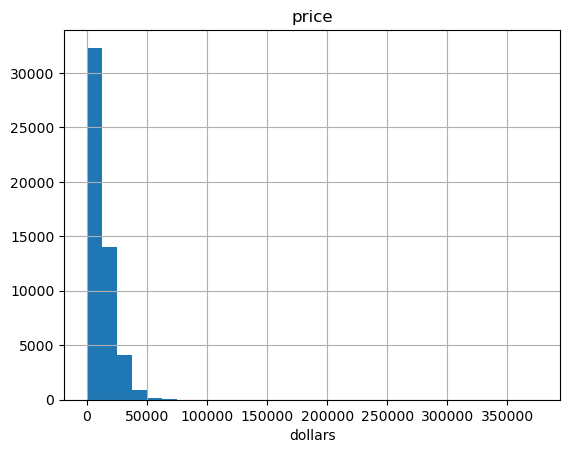

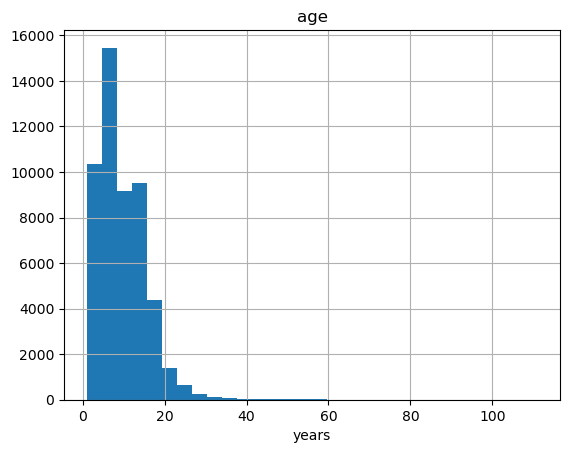

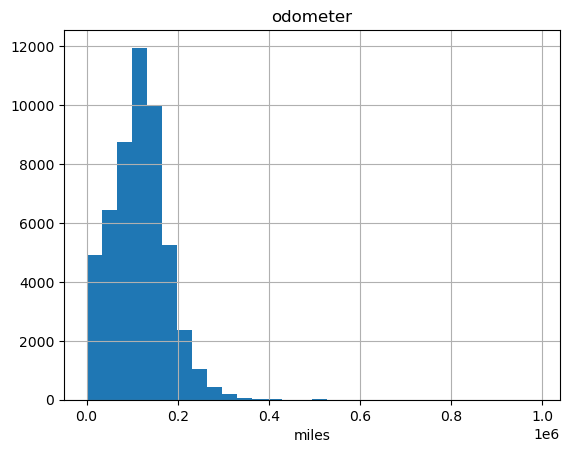

In [45]:
hist_list = ['price', 'age', 'odometer']
name_list = ['dollars', 'years', 'miles']

for i in [0, 1, 2]:
    df.hist(hist_list[i], bins=30)
    plt.xlabel(name_list[i])

Con base en estos histogramas, se observa lo siguiente:
- El precio de la mayoría de vehículos es menor o igual que $100,000.
- La antigüedad de la mayoría de los vehículos es menor o igual 60 años.
- El millaje de la mayoría de vehículos es menor o igual a 600,000 millas.

A continuación se mostrarán los histogramas de los parámetros de cilindraje y condición.

Text(0.5, 0, 'values')

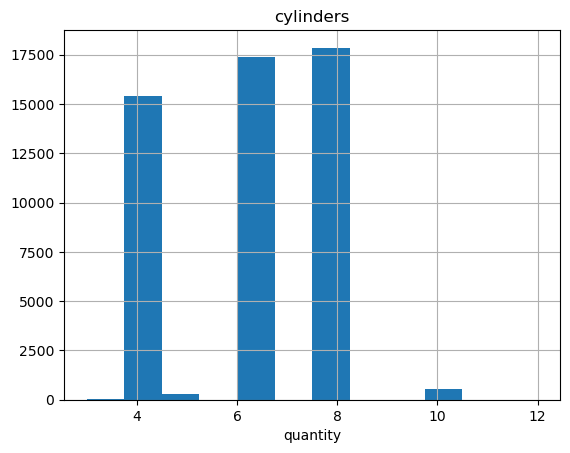

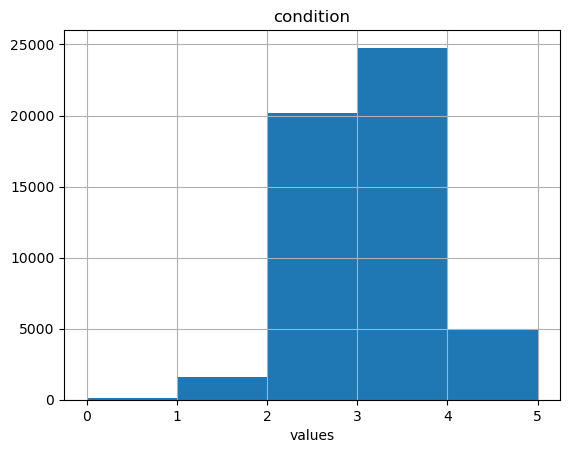

In [46]:
df.hist('cylinders', bins=12)
plt.xlabel('quantity')

df.hist('condition', bins=5)
plt.xlabel('values')

En ambos histogramas los datos no parecen estar muy alejados de la media.

[Volver a Contenidos](#back)

### 3.2. Valores atípicos <a id='data_analysis_atypical'></a>

Se averiguará con diagramas de caja los valores atípicos de los parámetros anteriores. Para ello se creará una función y se aplicará a las columnas: `'price'`, `'odometer'` y `'age'`.

In [47]:
def fun_boxplot(string):
    df.boxplot(column=string)
    print(df[string].describe())

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64


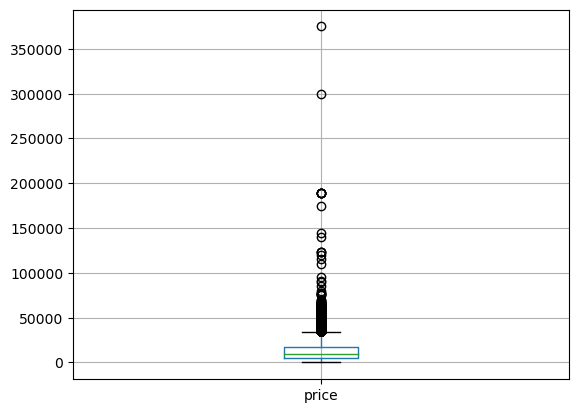

In [48]:
fun_boxplot('price')

count     51524.000000
mean     115204.967656
std       62084.290072
min           0.000000
25%       73500.000000
50%      114054.000000
75%      152773.000000
max      990000.000000
Name: odometer, dtype: float64


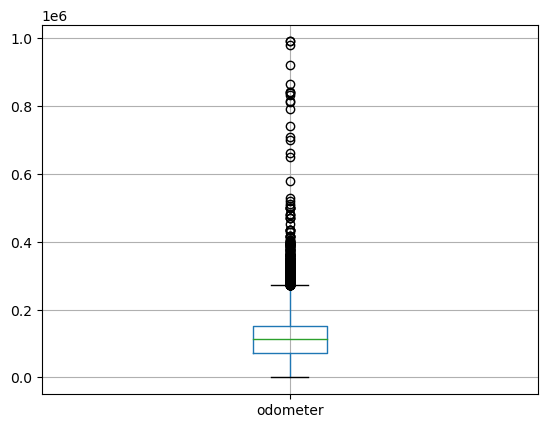

In [49]:
fun_boxplot('odometer')

count    51524.000000
mean         9.509229
std          6.102760
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64


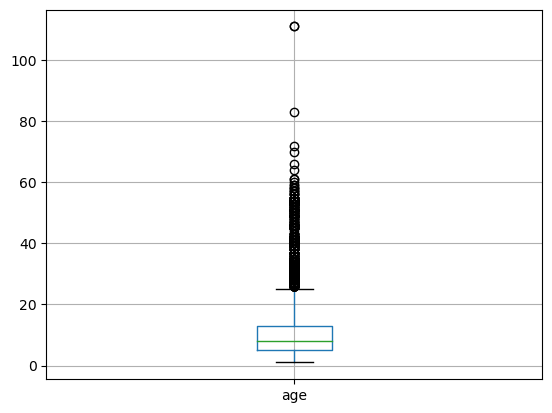

In [50]:
fun_boxplot('age')

Se calculará el rango intercuantil (IQR) para determinar el límite superior de cada columna. Para ello se creará una función.

In [51]:
def lim_sup(string):
    Q1 = df[string].quantile(0.25)
    Q3 = df[string].quantile(0.75)
    IQR = Q3 - Q1
    lim_superior = Q3 + (1.5 * IQR)
    return lim_superior

In [52]:
lim_sup_price = lim_sup('price')
lim_sup_odometer = lim_sup('odometer')
lim_sup_age = lim_sup('age')

[Volver a Contenidos](#back)

### 3.3. Histogramas sin valores atípicos <a id='data_analysis_typical'></a>

Se filtrará la tabla sin valores atípicos en las columnas `'price'`, `'age'` y `'odometer'`.

In [53]:
good_df = df.query('(price < @lim_sup_price) & (age < @lim_sup_age) & (odometer < @lim_sup_odometer)').reset_index(drop=True)
good_df.info()
print()
print(good_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48411 entries, 0 to 48410
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              48411 non-null  int64         
 1   model_year         48411 non-null  float64       
 2   model              48411 non-null  object        
 3   condition          48411 non-null  int64         
 4   cylinders          48411 non-null  float64       
 5   fuel               48411 non-null  object        
 6   odometer           48411 non-null  float64       
 7   transmission       48411 non-null  object        
 8   type               48411 non-null  object        
 9   paint_color        48411 non-null  object        
 10  is_4wd             48411 non-null  float64       
 11  date_posted        48411 non-null  datetime64[ns]
 12  days_listed        48411 non-null  int64         
 13  day_of_week        48411 non-null  int64         
 14  month 

Con la tabla filtrada se trazarán los histogramas de las tres columnas para compararlos con los anteriores.

count    48411.000000
mean     11224.865258
std       7822.039230
min          1.000000
25%       4999.000000
50%       8995.000000
75%      15990.000000
max      34555.000000
Name: price, dtype: float64
count    48411.000000
mean         9.207887
std          4.998902
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         24.000000
Name: age, dtype: float64
count     48411.000000
mean     114701.711305
std       55795.452813
min           0.000000
25%       77000.000000
50%      115900.000000
75%      152000.000000
max      271175.000000
Name: odometer, dtype: float64


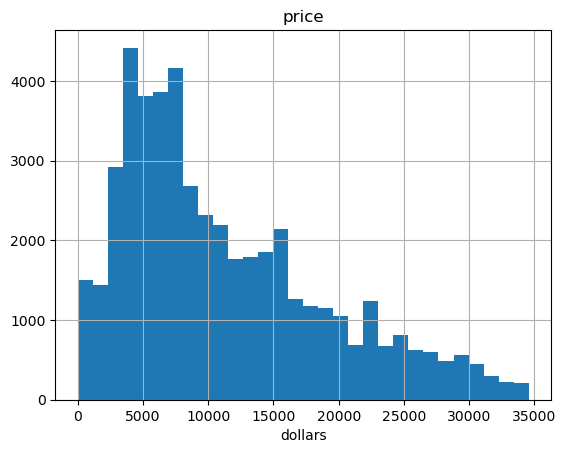

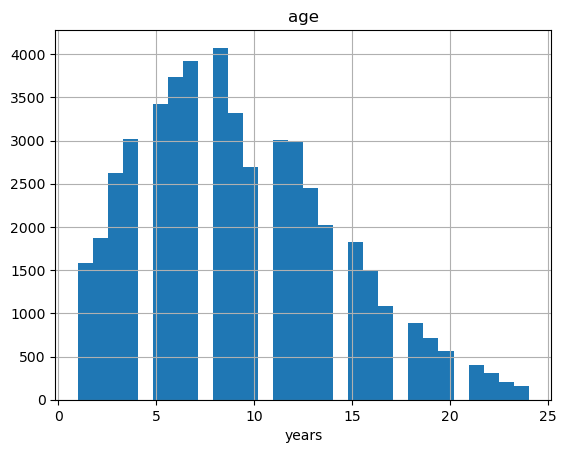

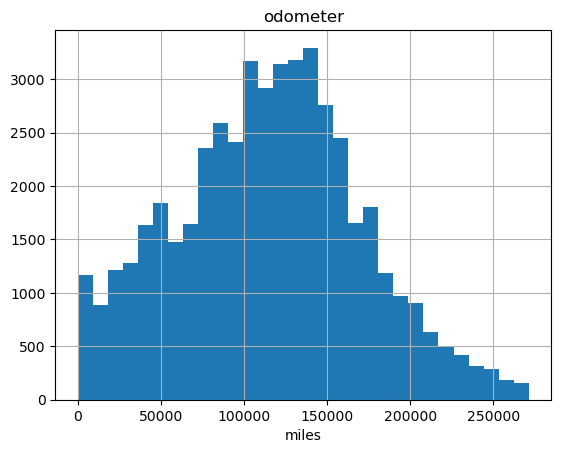

In [54]:
for i in [0, 1, 2]:
    good_df.hist(hist_list[i], bins=30)
    plt.xlabel(name_list[i])
    print(good_df[hist_list[i]].describe())

### 3.4. Conclusiones <a id='data_analysis_conclusions'></a>

Los histogramas ahora muestran una distribución más normal y arrojan mucha más información que los de la tabla sin filtrar. Cabe mencionar que la tabla sin filtrar contaba con datos de 51,524 vahículos, mientras que la tabla filtrada cuenta con datos de 48,411 vehículos. Es decir, el 6.04% de los datos presentaban valores atípicos en estos tres parámetros.

Con la tabla filtrada se tienen las siguientes observaciones:
- El 75% de los vehículos tiene un precio menor o igual que $15,990 y el precio máximo es $34,555. Anteriormente existían datos de vehículos con un precio de hasta $375,000.
- El 75% de los vehículos tiene una antigüedad menor o igual que 12 años y la antigüedad máxima es de 23 años. Anteriormente existían datos de vehículos con hasta 110 años de antigüedad.
- El 75% de los vehículos tiene un recorrido menor o igual que 152,000 millas. Anteriormente existían datos de vehículos con un recorrido de hasta 990,000 millas.

[Volver a Contenidos](#back)

## Etapa 4. Comprobación de hipótesis <a id='data_hypothesis'></a>

En esta etapa se comprobarán las hipótesis planteadas en un principio, las cuales son:
1. El período de publicación de los anuncios es afectado por la antigüedad, precio y condición del vehículo.
2. El factor que influye en mayor porcentaje es la transmisión del vehículo.
3. Además de la transmisión, los factores que influyen en el precio del vehículo es su antigüedad y el millaje.
4. El color del vehículo no es un factor que influya en el precio del vehículo.

Para ello se utilizarán diagramas de dispersión y la correlación de Pearson.

### 4. 1. Período de colocación de los anuncios <a id='data_hypothesis_spots'></a>

Se estudiará la columna `'days_listed'` de la tabla filtrada para determinar la media y mediana de estos datos. Además, se determinará cuando fueron eliminados rápidamente y cuando fueron publicados por un tiempo anormalmente largo.

count    48411.000000
mean        39.539175
std         28.208349
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
Media: 39.539174980892774, Mediana: 33.0
Límite inferior: -32.0, Límite superior: 104.0


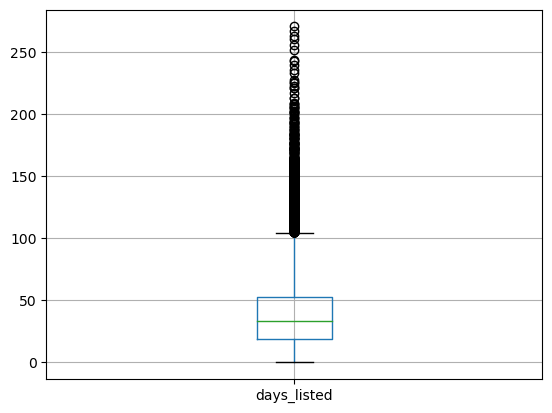

In [55]:
print(good_df['days_listed'].describe())

good_df.boxplot(column='days_listed')
Q1_days = good_df['days_listed'].quantile(0.25)
Q2_days = good_df['days_listed'].quantile(0.5)
Q3_days = good_df['days_listed'].quantile(0.75)
days_IQR = Q3_days - Q1_days
lim_sup_days = Q3_days + (1.5 * days_IQR)
lim_inf_days = Q1_days - (1.5 * days_IQR)
days_mean = good_df['days_listed'].mean()

print(f'Media: {days_mean}, Mediana: {Q2_days}')
print(f'Límite inferior: {lim_inf_days}, Límite superior: {lim_sup_days}')

El período de colocación habitual de un anuncio es de 33 días, de hecho, el 50% de los anuncios fueron publicados en un rango de entre 19 y 53 días.

Existen anuncios con un período de publicación anormalmente largo (más de 104 días). Por otro lado, el 25% de los anuncios fueron publicados por un período menor a 19 días.

La primera hipótesis es que los factores que influyen en el tiempo de publicación de los anuncios son: precio, antigüedad y condición. Es decir, a mayor precio, mayor antigüedad o peor condición, los anuncios tienen un período de publicación anormalmente largo.

Se mostrará la correlación de Pearson de estos factores.

In [56]:
factor_list = ['price', 'age', 'condition']
for factor in factor_list:
    correlation = good_df['days_listed'].corr(good_df[factor])
    print(f'La correlación entre días y {factor} es: {correlation}')
    print()

La correlación entre días y price es: -0.001001927992851316

La correlación entre días y age es: 0.003576261304612198

La correlación entre días y condition es: 0.000644711896212584



Se observa que la correlación de la duración del anuncio y cualquier otro parámentro (precio, antigüedad o condición) es muy cercana a 0. Por esta razón concluimos que no existe una relación lineal. La hipótesis planteada es falsa.

[Volver a Contenidos](#back)

### 4. 2. Factores que influyen en el precio de un vehículo <a id='data_hypothesis_price'></a>

En esta sección se mostrarán los índices de correlación del precio con cada parámetro considerado: antigüedad, condición, millaje, transmisión y color. Con esto se determinará si son factores que influyen en el precio de un vehículo.

Para comenzar se estudiarán los tipos de vehículos con un mayor cantidad de anuncios y el promedio de precio por tipo de vehículo.

In [57]:
spots_df = good_df.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
spots_df.columns = ['count', 'mean_price']
print(spots_df.sort_values(by='count', ascending=False))

             count    mean_price
type                            
sedan        12027   6973.522574
SUV          11919  10435.767850
truck        11127  15130.293880
pickup        6304  15050.901491
coupe         2015  13523.516625
wagon         1506   8975.517928
mini-van      1147   8046.564080
hatchback     1005   6838.702488
van            584   8820.914384
convertible    341  13046.598240
other          233  10542.137339
offroad        182  14344.049451
bus             21  18107.428571


<AxesSubplot:>

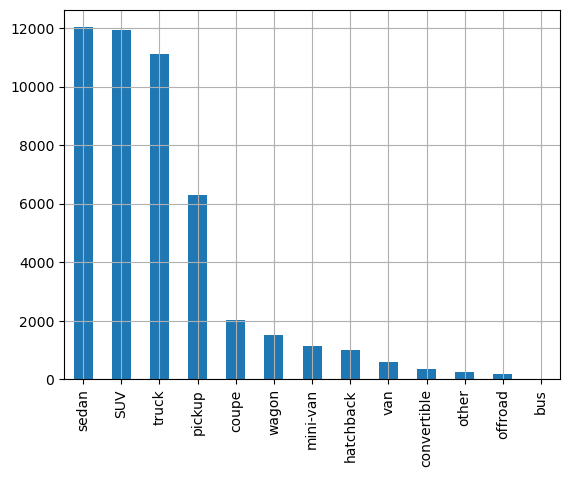

In [58]:
good_df['type'].value_counts().plot(kind='bar', grid='True')

Se observa que existen 4 tipos de vehículos (sedan, suv, truck, pickup) cuya cantidad de anuncios superan los 6,000 anuncios. Los vehículos tipo sedan y suv encabezan la lista con 12,027 y 11,919 anuncios respectivamente.

Se agruparán los tipos de vehículos que no superen los 6,000 anuncios en la categoría `'other'`. Para ello primero se creará una lista con las 4 categorías que superan los 6,000 anuncios.

In [59]:
main_types = spots_df[spots_df['count'] > 6000].index
print(main_types)

Index(['SUV', 'pickup', 'sedan', 'truck'], dtype='object', name='type')


Se reemplaza el tipo de vehículo si no se encuentra en la lista anterior. 

<AxesSubplot:>

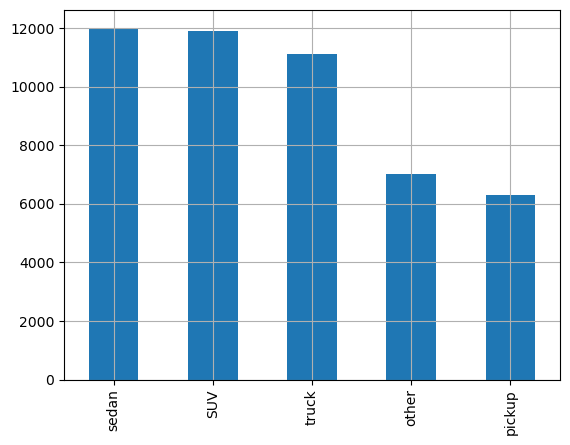

In [60]:
good_df['type'] = good_df['type'].where(
    good_df['type'].isin(main_types), 'other'
)
good_df['type'].value_counts().plot(kind='bar', grid=True)

Se crearán tablas filtradas por tipo de vehículo a partir de la tabla general. Para ello se creará un diccionario en el que sus valores serán las tablas correspondientes.

In [61]:
vehicle_types = ['sedan', 'SUV', 'truck', 'other', 'pickup']
vehicles = {}

for type in vehicle_types:
    vehicles[type] = good_df.query('type == @type')

print(vehicles['truck'].head())

    price  model_year                model  condition  cylinders fuel  \
22   7500      2004.0  chevrolet silverado          4        8.0  gas   
38   8000      2009.0            ford f150          2        8.0  gas   
47   6200      2006.0            ford f150          3        6.0  gas   
50  10400      2012.0   chevrolet colorado          3        5.0  gas   
57  13000      2005.0             ram 1500          2        8.0  gas   

    odometer transmission   type paint_color  is_4wd date_posted  days_listed  \
22  180000.0    automatic  truck         red     1.0  2019-01-05           64   
38  234000.0    automatic  truck       black     1.0  2019-03-31            1   
47   69698.0    automatic  truck      custom     0.0  2018-05-03           50   
50  111871.0    automatic  truck         red     1.0  2019-01-30           27   
57  146000.0    automatic  truck        grey     1.0  2019-03-14           26   

    day_of_week  month  year   age  odometer_per_year  
22            5   

No todas las columnas de las tablas son necesarias, por ello se creará una función que elimine columnas sobrantes y se aplicará la función a cada una de las cinco tablas obtenidas.

In [62]:
def drop_columns(data):
    data = data.drop(columns=[
        'model_year', 'model', 'cylinders', 'fuel', 'type', 'is_4wd', 'date_posted',
        'days_listed', 'day_of_week', 'month', 'year', 'odometer_per_year'
    ])
    return data

for type in vehicle_types:
    vehicles[type] = drop_columns(vehicles[type])
    print(vehicles[type].head())
    print()

    price  condition  odometer transmission paint_color  age
2    5500          4  110000.0    automatic         red  7.0
4   14900          3   80903.0    automatic       black  3.0
5   14990          3   57954.0    automatic       black  5.0
6   12990          3   79212.0    automatic       white  4.0
11   8990          3  111142.0    automatic        grey  8.0

    price  condition  odometer transmission paint_color   age
0    9400          2  145000.0    automatic     unknown   8.0
7   15990          3  109473.0    automatic       black   7.0
8   11500          3  104174.0    automatic     unknown   7.0
9    9200          3  147191.0    automatic        blue  12.0
14  12990          3  132285.0    automatic       black  11.0

    price  condition  odometer transmission paint_color   age
22   7500          4  180000.0    automatic         red  16.0
38   8000          2  234000.0    automatic       black  11.0
47   6200          3   69698.0    automatic      custom  13.0
50  10400   

[Volver a Contenidos](#back)

#### 4. 2. 1. Correlación precio - antigüedad, millaje, condición <a id='data_hypothesis_price_corr'></a>

Se analizará la matriz de dispersión de cada una de las tablas obtenidas anteriormente.

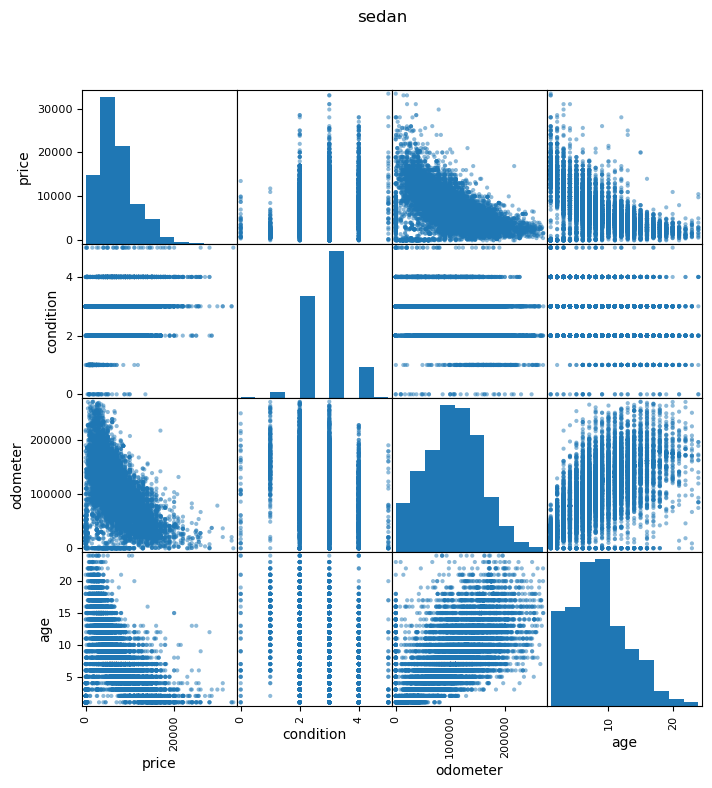

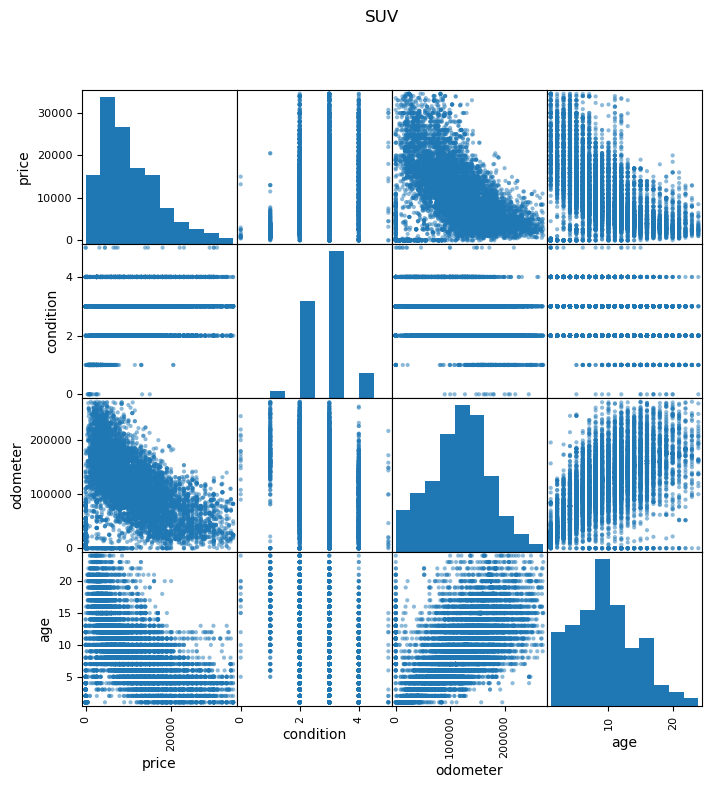

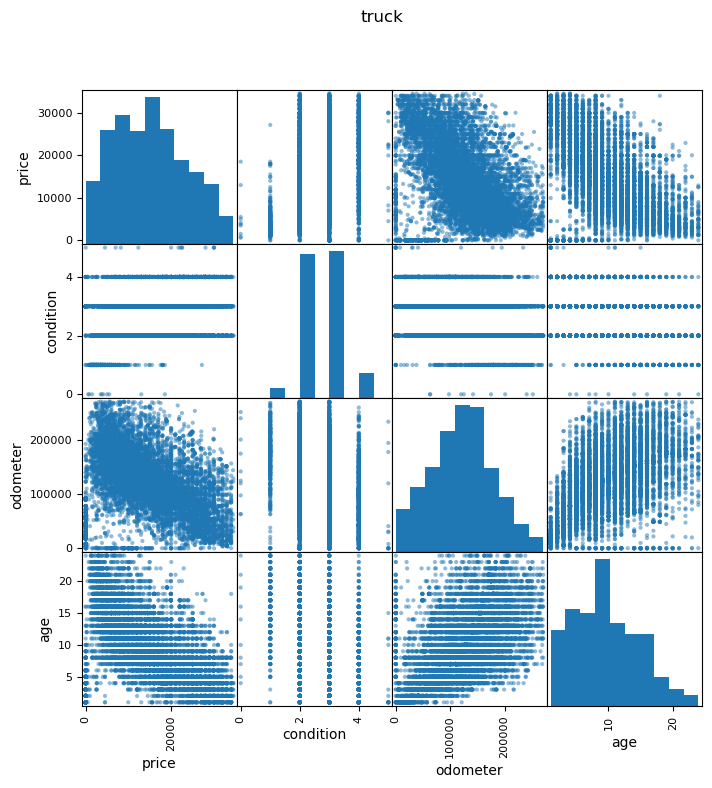

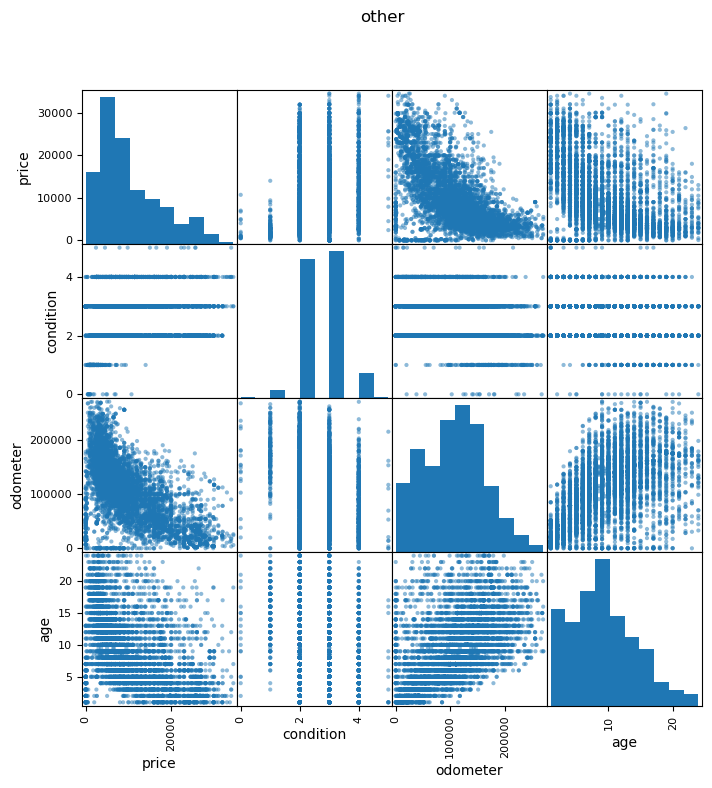

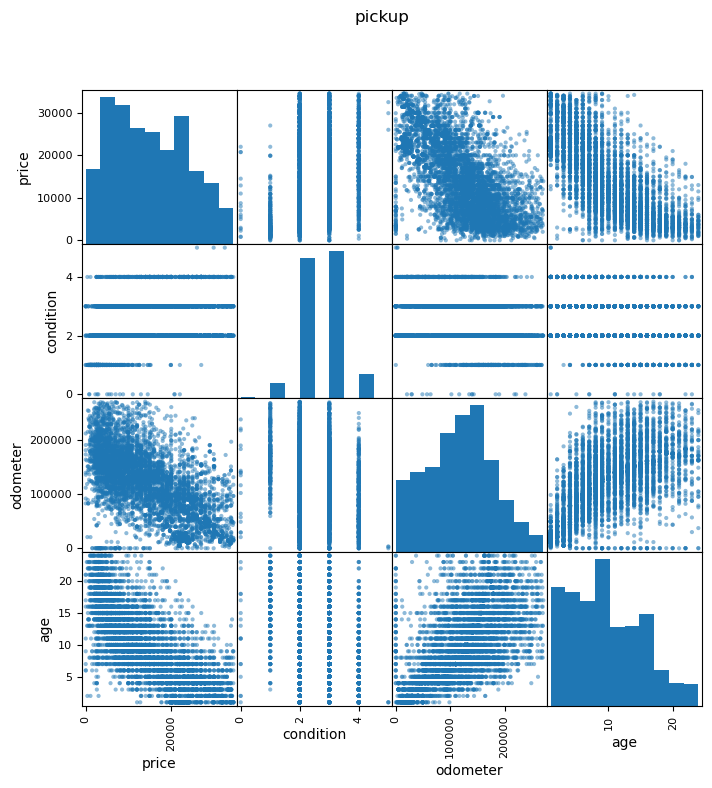

In [63]:
for type in vehicle_types:
    pd.plotting.scatter_matrix(vehicles[type], figsize=(8, 8))
    plt.suptitle(type)

Con base en los diagramas de dispersión se observa los siguiente para cada tipo de vehículo:
- A mayor millaje es menor el precio.
- A mayor antigüedad es menor el precio.

Sin embargo no es claro la relación precio - condición. Para ello, se mostrarán los coeficientes de correlación de Pearson.

In [64]:
for type in vehicle_types:
    print(type)
    print(vehicles[type].corr())
    print()

sedan
              price  condition  odometer       age
price      1.000000   0.293933 -0.563191 -0.615618
condition  0.293933   1.000000 -0.321880 -0.297593
odometer  -0.563191  -0.321880  1.000000  0.624537
age       -0.615618  -0.297593  0.624537  1.000000

SUV
              price  condition  odometer       age
price      1.000000   0.262879 -0.523665 -0.576303
condition  0.262879   1.000000 -0.321764 -0.308862
odometer  -0.523665  -0.321764  1.000000  0.633562
age       -0.576303  -0.308862  0.633562  1.000000

truck
              price  condition  odometer       age
price      1.000000   0.271199 -0.446654 -0.584974
condition  0.271199   1.000000 -0.266938 -0.295664
odometer  -0.446654  -0.266938  1.000000  0.551291
age       -0.584974  -0.295664  0.551291  1.000000

other
              price  condition  odometer       age
price      1.000000   0.131130 -0.629115 -0.518275
condition  0.131130   1.000000 -0.222102 -0.169183
odometer  -0.629115  -0.222102  1.000000  0.565601
age   

Numéricamente se confirma lo siguiente:
- La correlación precio - antigüedad siempre es negativa y menor que -0.5 (para cualquier tipo de vehículo). Esto es, es más cercana a -1. Por lo que se afirma que a mayor antigüedad, el precio es menor.
- La correlación precio - millaje siempre es negativa y en todos los tipos, salvo en 'truck', es menor que -0.5, sin embargo, en este caso es de -0.44. Por lo que se afirma que a mayor millaje, el precio es menor.
- La correlación precio - condición siempre es positiva. Sin embargo, en ninguno de los tipos de vehículos supera 0.3. Esto es, es más cercana a 0, aunque existe correlación lineal no es muy representativa.

[Volver a Contenidos](#back)

#### 4. 2. 2. Correlación precio - transmisión, color <a id='data_hypothesis_price_corr_2'></a>

Para analizar esta correlación, al ser variables categóricas, se utilizarán diagramas de caja.

Primero se mostrarán la cantidad de anuncios de cada categoría (sobre la columna de transmisión) en cada una de las tablas. Esto es para verificar que cada categoría tiene al menos 50 anuncios.

In [65]:
for type in vehicle_types:
    print(type)
    print(vehicles[type]['transmission'].value_counts())
    print()

sedan
automatic    11318
manual         577
other          132
Name: transmission, dtype: int64

SUV
automatic    11299
manual         461
other          159
Name: transmission, dtype: int64

truck
automatic    10561
manual         375
other          191
Name: transmission, dtype: int64

other
automatic    5637
manual        748
other         649
Name: transmission, dtype: int64

pickup
automatic    5408
other         616
manual        280
Name: transmission, dtype: int64



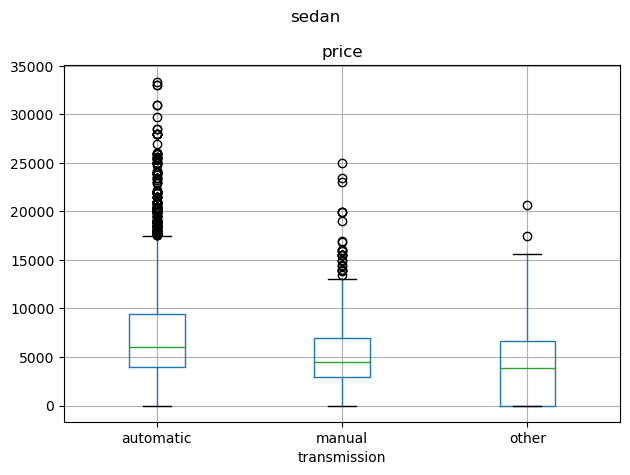

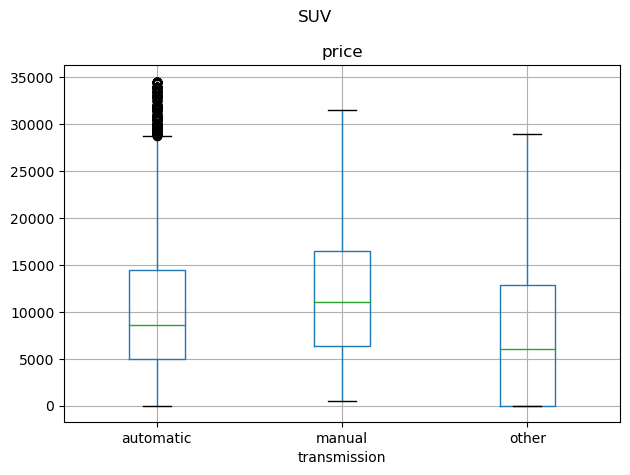

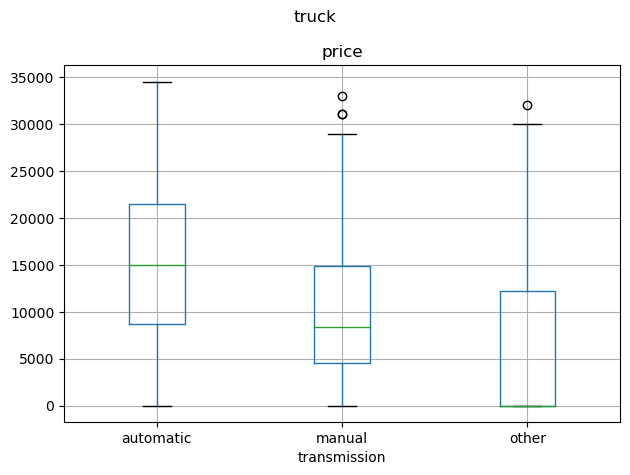

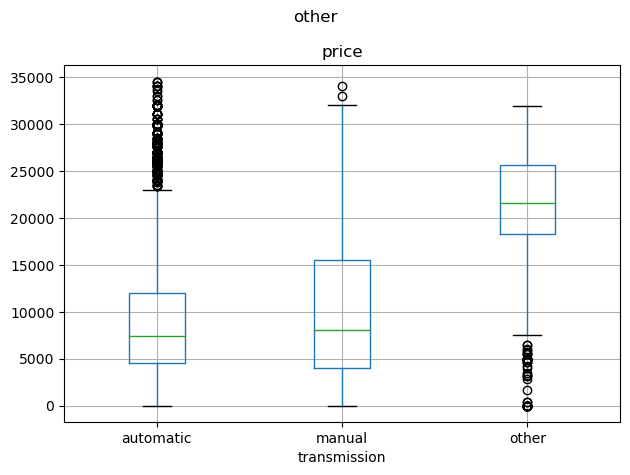

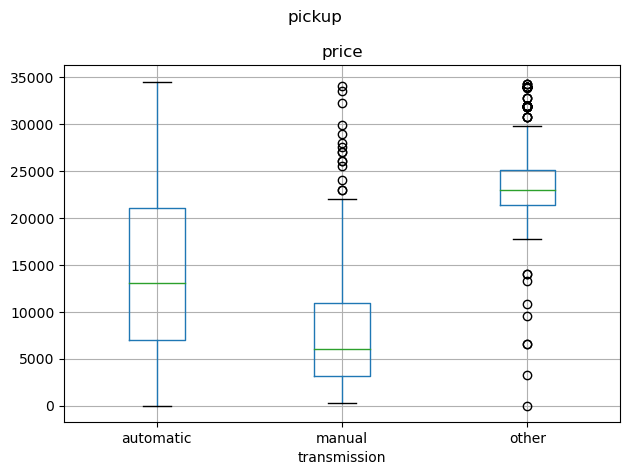

In [66]:
for type in vehicle_types:
    vehicles[type].boxplot(column='price', by='transmission')
    plt.suptitle(type)
    plt.tight_layout()

Con base en los diagramas se observa lo siguiente:
- En los tipos de vehículos sedan y truck, el precio es mayor cuando la transmisión del vehículo es automática.
- En el tipo de vehículo suv, el precio es mayor cuando la transmisión es manual.
- En los demás tipos de vehículos, el precio es mayor cuando la transmisión es otra.

Los dos tipos de vehículos más populares son sedan y suv, por lo que la correlación precio - transmisión no es concluyente.

A continuación, se realizará un procedmiento análogo para analizar la correlación precio - color.

In [67]:
for type in vehicle_types:
    print(type)
    print(vehicles[type]['paint_color'].value_counts())
    print()

sedan
unknown    2166
silver     2037
black      1758
grey       1611
white      1491
blue       1220
red         936
custom      297
brown       254
green       203
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64

SUV
unknown    2144
black      2099
white      1874
silver     1531
grey       1147
blue       1012
red         874
green       422
brown       352
custom      299
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

truck
white      3347
unknown    1927
black      1398
red         947
silver      933
grey        849
blue        820
custom      299
green       257
brown       227
yellow       65
orange       45
purple       13
Name: paint_color, dtype: int64

other
unknown    1276
black      1084
silver      912
white       885
red         746
blue        728
grey        699
green       249
custom      169
brown       143
yellow       81
orange       54
purple        8
Name: paint_color, dtype: int64

pickup
white  

En este caso, hay categorías que no superan los 50 anuncios, sin embargo, para cada tipo de vehículos existen colores comúnes con más de 500 anuncios. Los colores que no están dentro de esta lista se agruparán en la categoría 'other'.

In [68]:
main_colors = ['unknown', 'silver', 'black', 'grey', 'white', 'blue', 'red'] #colores con más de 500 anuncios
for type in vehicle_types:
    vehicles[type]['paint_color'] = vehicles[type]['paint_color'].where(vehicles[type]['paint_color'].isin(main_colors), 'other')

for type in vehicle_types:
    print(type)
    print(vehicles[type]['paint_color'].value_counts())
    print()

sedan
unknown    2166
silver     2037
black      1758
grey       1611
white      1491
blue       1220
red         936
other       808
Name: paint_color, dtype: int64

SUV
unknown    2144
black      2099
white      1874
silver     1531
other      1238
grey       1147
blue       1012
red         874
Name: paint_color, dtype: int64

truck
white      3347
unknown    1927
black      1398
red         947
silver      933
other       906
grey        849
blue        820
Name: paint_color, dtype: int64

other
unknown    1276
black      1084
silver      912
white       885
red         746
blue        728
other       704
grey        699
Name: paint_color, dtype: int64

pickup
white      1635
unknown    1204
black       855
silver      632
red         586
grey        512
blue        459
other       421
Name: paint_color, dtype: int64



Se mostrarán los diagramas de caja.

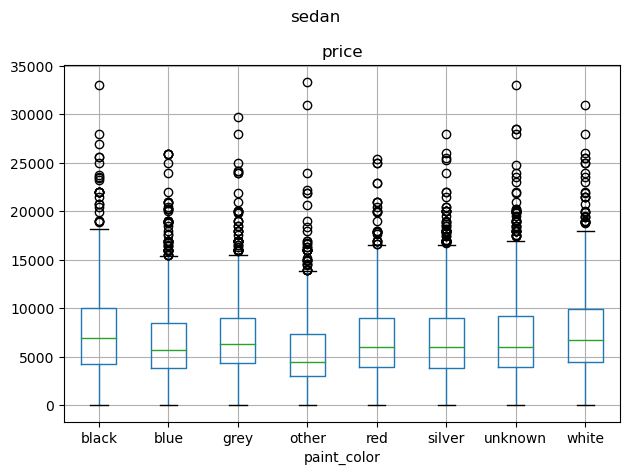

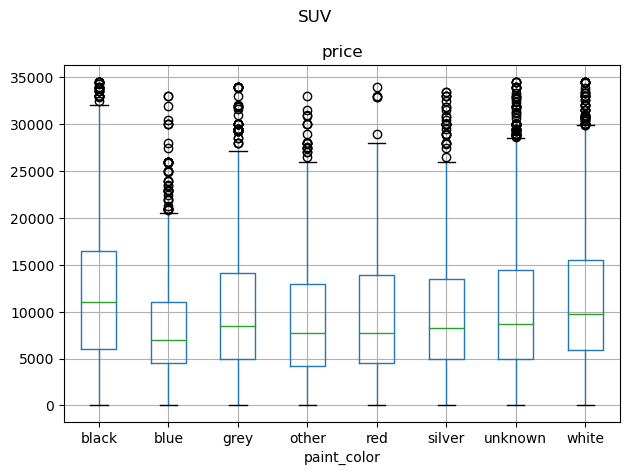

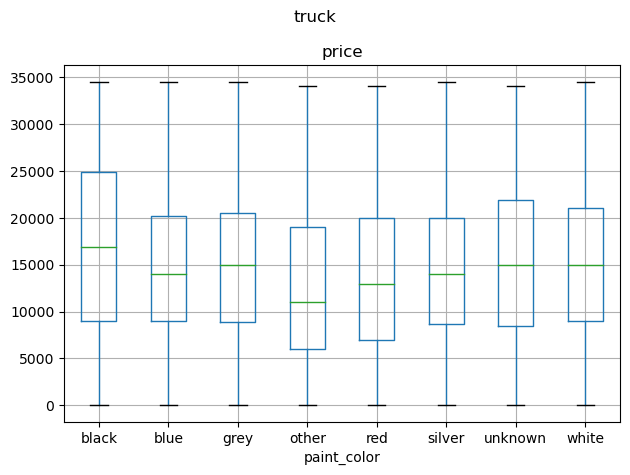

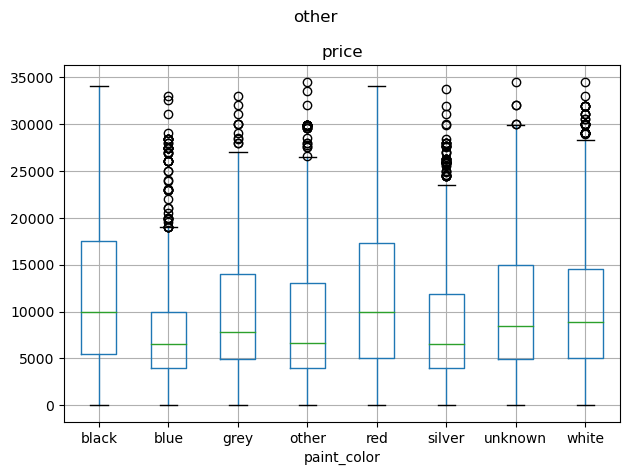

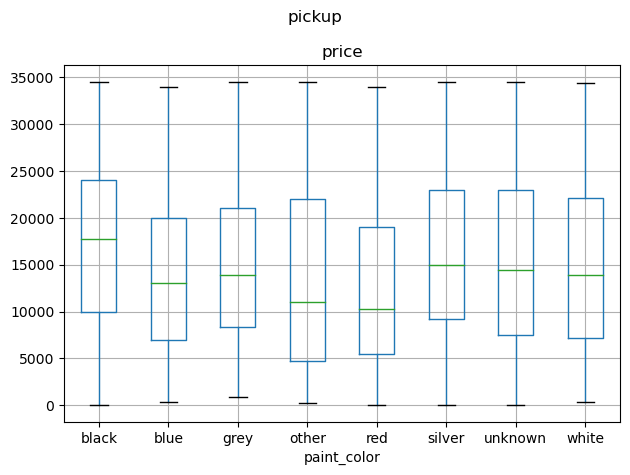

In [69]:
for type in vehicle_types:
    vehicles[type].boxplot(column='price', by='paint_color')
    plt.suptitle(type)
    plt.tight_layout()

Con base en los gráficos se observa lo siguiente:
- Los vehículos de color negro son más costosos, sin importar el teipo de vehículo, sin embargo, no es una diferencia considerablemente grande con respecto a los otros colores.
- El color que le sigue al negro en cuanto a precio es distinto para cada tipo de vehículos, en algunos casos es blanco y en otros es rojo.

[Volver a Contenidos](#back)

## Etapa 5. Conclusión general <a id='data_conclusion'></a>

La primera hipótesis planteada fue:
1. El período de publicación de los anuncios es afectado por la antigüedad, precio y condición del vehículo.

Se obervó que la correlación que existe con cada uno de estos factores es muy cercana a cero. Por esta razón se concluye que la hipótesis no es correcta.

La segunda hipótesis fue:

2. El factor que influye en mayor porcentaje es la transmisión del vehículo.

Se observó que la relación precio - transmisión varía dependiendo del tipo de vehículo, en algunos casos los vehículos son más costosos cuando tienen transmisión automática y en algunos otros cuando tienen transmisión manual. Por esta razón, la hipótesis no es correcta y se concluye que la transmisión es de los factores que menos influyen en el precio de un vehículo.

La tercera hipótesis fue:

3. Además de la transmisión, los factores que influyen en el precio del vehículo es su antigüedad y el millaje.

Se observó una correlación negativa de precio - antigüedad y precio - millaje. Em ambos casos esta correlación es menor que -0.5. Por ello se concluye que la hipótesis es correcta. Ambos factores influyen en el precio del vehículo. A mayor antigüedad o mayor millaje se tiene un precio menor. Otro factor que influye en el precio del vehículo es la condición del mismo, sin embargo, esta correlación siempre es menor que 0.3. Se concluye que es un factor que influye pero no en gran medida.

La última hipótesis fue:

4. El color del vehículo no es un factor que influya en el precio del vehículo.

Se observó que los vehículos de color negro son más costosos, aunque no parece ser una diferencia significativa con respecto a los otros colores. Se con concluye que la hipótesis no es del todo correcta, pues el color negro influye en el precio pero sin ser un factor de gran peso.

[Volver a Contenidos](#back)